<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/Ttest_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
from scipy.stats import norm, ttest_1samp, t, ttest_rel
from statsmodels.stats.weightstats import ztest
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [2]:
x = np.array([5,19,11,23,12,7,3,21])

ttest_1samp(x,  popmean= 10, alternative= 'two-sided')

Ttest_1sampResult(statistic=0.9774618943338158, pvalue=0.3609040745666327)

We have not gathered sufficient information to reject the null hypothesis. Hence sample mean is not statisticall significantly different from population mean. The p value is greater than alpha value of 0.05

In [3]:
# Apartments in Santa Clara County H0: u = 1830; H1: U != 1830
mui = 1830
x  = 1700
sd = 200
n =25
standard_error = sd/np.sqrt(n)
t = (x- mui)/standard_error
print( "The test statistics is :", t)

The test statistics is : -3.25


In [7]:
t_left_critical = t.ppf(0.025, df = n-1)
print("Left value of t critical")
print(t_left_critical)

t_right_critical = t.ppf(0.975, df = n-1)
print("\nRight value of t critical")
print(t_right_critical)

# Cohen's d value
cohens_d = np.divide( x- mui, sd) 
print("\nCohen's d estimate is :")
print(cohens_d)

# Estimate the CI 
lb = x + ( t_left_critical * standard_error)
ub = x + (t_right_critical * standard_error)

print("\nThe lower bound of the 95% CI is :", lb)
print("\nThe upper bound of the 95% CI is :", ub)

print("\nAverage of lower bound and upper bound of 95% CI is :", (ub+lb)*0.5)

Left value of t critical
-2.063898561628021

Right value of t critical
2.0638985616280205

Cohen's d estimate is :
-0.65

The lower bound of the 95% CI is : 1617.4440575348792

The upper bound of the 95% CI is : 1782.5559424651208

Average of lower bound and upper bound of 95% CI is : 1700.0


We have gathered sufficient information to reject the null hypothesis. Hence sample mean is statisticall significantly different from population mean. The t statistics is less than t_left_critical (i.e. in one of the critical regions)

## If the sample size increases to 100 are our results different?

In [8]:
# Apartments in Santa Clara County H0: u = 1830; H1: U != 1830
mui = 1830
x  = 1700
sd = 200
n =100
standard_error = sd/np.sqrt(n)
t_left_critical = t.ppf(0.025, df = n-1)
t = (x- mui)/standard_error
print( "\nThe test statistics is :", t)
margin_error = -(t_left_critical* standard_error)
print("\nThe Margin of error is :", margin_error)


The test statistics is : -6.5

The Margin of error is : 39.68433903017366


# Within Subject Experimental Design: Paired/Dependent Test

## Investigate the effect of keybaord type on error made by a sample size (n) = 25

In [9]:
# Load dataset
df = pd.read_csv('Keyboards.csv')

df.head()

,QWERTY errors,Alphabetical errors
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [10]:
# Show shape of dataframe
df.shape

(25, 2)

In [11]:
# Show dataframe information and check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   QWERTY errors        25 non-null     int64
 1   Alphabetical errors  25 non-null     int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [12]:
# Show stats summary
df.describe()

,QWERTY errors,Alphabetical errors
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


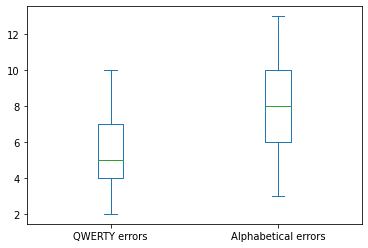

In [15]:
# Visualize dataset
df.plot(kind = 'box')
plt.show()

In [19]:
# Point estimate for the difference between mean of both methods
print(df['QWERTY errors'].mean() - df['Alphabetical errors'].mean())

-2.7199999999999998


## Method 1: paired test scipy method

In [24]:
ttest_rel( df['QWERTY errors'].values, df['Alphabetical errors'].values)

Ttest_relResult(statistic=-3.6842075835369266, pvalue=0.0011653976281601139)

In [26]:
t_left_critical = t.ppf(0.025, df = df.shape[0]-1)
t_left_critical

-2.063898561628021

We have gathered sufficient information to reject the null hypothesis. Hence sample mean of the error from both keyboard is statisticall significantly. The t statistics is less than t_left_critical for alpha value of 0.05 (i.e. in one of the critical regions). Similarly the p value is less than 0.025 since two-tailed test. Hence we can conclude that the type of keyboard has an effect on number of errors.

Method 2: The long journey

In [20]:
# Create new column which is difference between the above columns
df['sample_error'] = df['QWERTY errors'] - df['Alphabetical errors']

df.head()

,QWERTY errors,Alphabetical errors,sample_error
0,6,6,0
1,6,11,-5
2,2,8,-6
3,7,5,2
4,8,11,-3


In [21]:
# Summary Stats
df.describe()


,QWERTY errors,Alphabetical errors,sample_error
count,25.000000,25.000000,25.000000
mean,5.080000,7.800000,-2.720000
std,2.059935,2.645751,3.691432
min,2.000000,3.000000,-11.000000
25%,4.000000,6.000000,-6.000000
50%,5.000000,8.000000,-3.000000
75%,7.000000,10.000000,0.000000
max,10.000000,13.000000,4.000000


In [22]:
# Find test statisics for the sample error
t_stats = -2.72/ (3.69/np.sqrt(25))
t_stats

-3.685636856368564

In [30]:
# Estimate the 95% CI for the sample mean difference
n = df.shape[0]
t_left_critical = t.ppf(0.025, df = n-1)
print("Left value of t critical")
print(t_left_critical)

t_right_critical = t.ppf(0.975, df = n-1)
print("\nRight value of t critical")
print(t_right_critical)

standard_error = 3.69/5

# Estimate the CI 
lb = -2.72 + ( t_left_critical * standard_error)
ub = -2.72 + (t_right_critical * standard_error)

print("\nThe lower bound of the 95% CI is :", lb)
print("\nThe upper bound of the 95% CI is :", ub)

print("\nAverage of lower bound and upper bound of 95% CI is :", (ub+lb)*0.5)






Left value of t critical
-2.063898561628021

Right value of t critical
2.0638985616280205

The lower bound of the 95% CI is : -4.24315713848148

The upper bound of the 95% CI is : -1.1968428615185212

Average of lower bound and upper bound of 95% CI is : -2.7200000000000006


In [28]:
# Calculate the effect size difference i.e. Cohen's d
cohens_d = -2.72/3.69
cohens_d

-0.7371273712737128